Life Cycle Process of Machine Learning

1. data cleansing and wrangling.
2. define the metricks for which models is getting optimized
3. Feature engineering
4. Data pre-processing
5. Feature selection
6. Split the data into training and test data sets.
7. Model selection
8. Model validation
9. Interpret the results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston =load_boston()

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [10]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
bos.shape

(506, 13)

In [12]:
bos['target']=boston.target

In [13]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [14]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [15]:
bos.shape

(506, 14)

In [16]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [17]:
bos.isnull().sum

<bound method DataFrame.sum of       CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  target  
0      

In [18]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


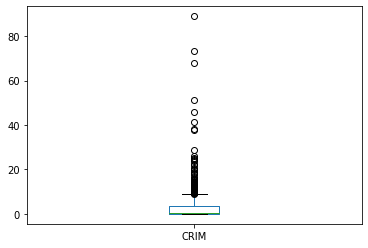

In [19]:
bos['CRIM'].plot.box()

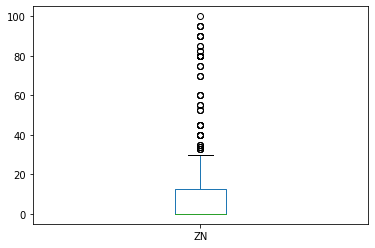

In [20]:
bos['ZN'].plot.box()

CRIM          AxesSubplot(0.125,0.536818;0.0945122x0.343182)
ZN         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
INDUS      AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
CHAS       AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
NOX        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
RM         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
AGE        AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
DIS              AxesSubplot(0.125,0.125;0.0945122x0.343182)
RAD           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
TAX           AxesSubplot(0.351829,0.125;0.0945122x0.343182)
PTRATIO       AxesSubplot(0.465244,0.125;0.0945122x0.343182)
B             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
LSTAT         AxesSubplot(0.692073,0.125;0.0945122x0.343182)
target        AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

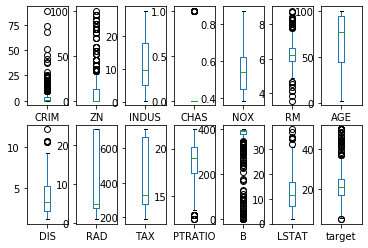

In [21]:
bos.plot(kind='box',subplots=True, layout=(2,7))

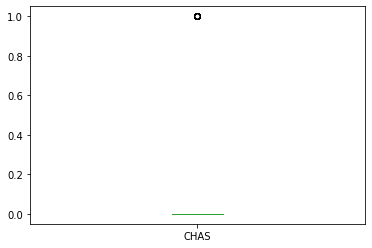

In [22]:
bos['CHAS'].plot.box()

In [23]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(bos))
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 0.44105193, 1.0755623 ,
        0.15968566],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.44105193, 0.49243937,
        0.10152429],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.39642699, 1.2087274 ,
        1.32424667],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.44105193, 0.98304761,
        0.14880191],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.4032249 , 0.86530163,
        0.0579893 ],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.44105193, 0.66905833,
        1.15724782]])

In [24]:
threshold=3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [25]:
z[55][1]

3.375038763517294

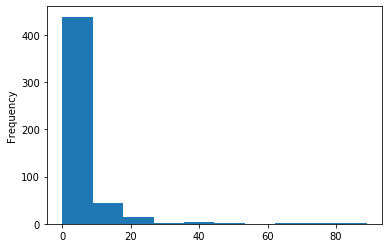

In [26]:
bos['CRIM'].plot.hist()

In [27]:
from scipy.stats import boxcox
bos['CRIM']=boxcox(bos['CRIM'],0)

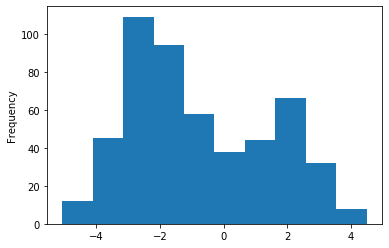

In [28]:
bos['CRIM'].plot.hist()

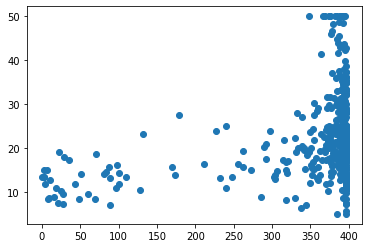

In [29]:
plt.scatter(bos['B'],bos['target'])
plt.show()

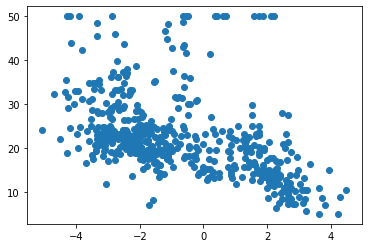

In [30]:
plt.scatter(bos['CRIM'],bos['target'])

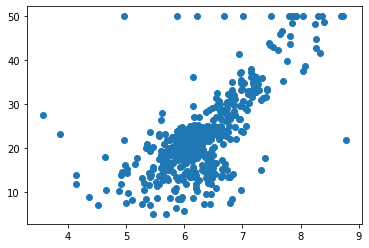

In [31]:
x=bos['RM']
y=bos['target']
plt.scatter(x,y)
plt.show()

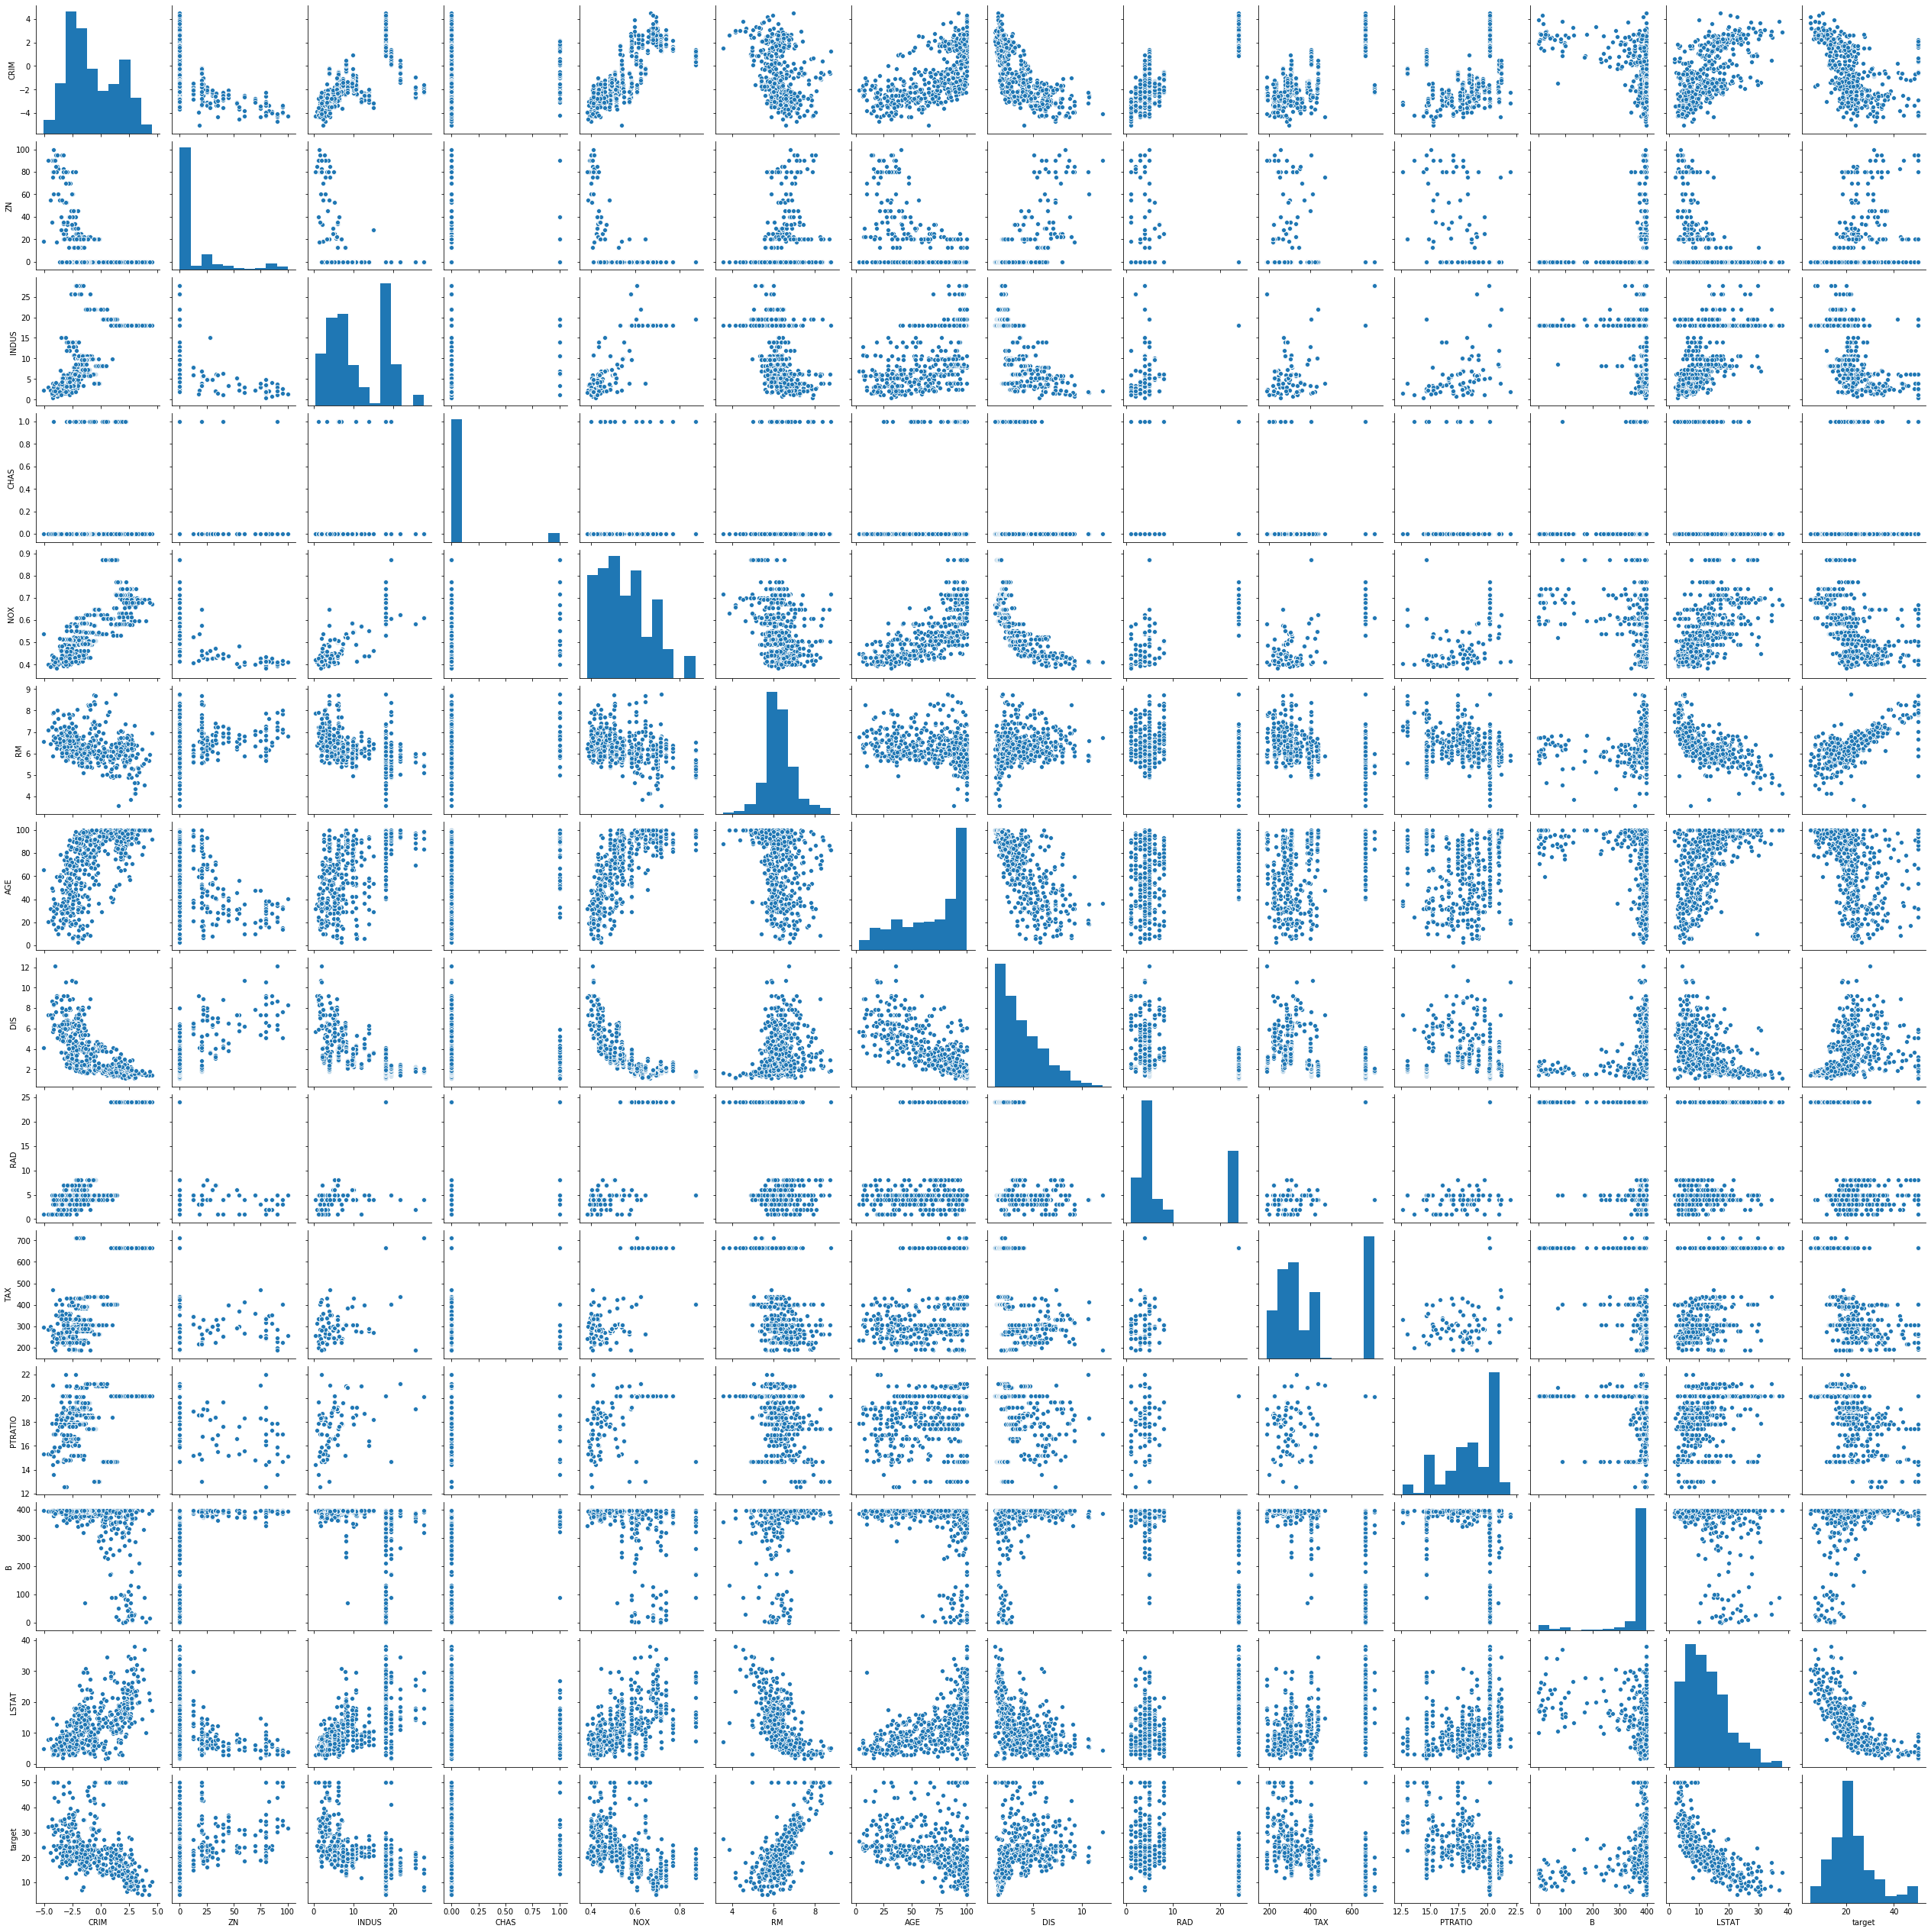

In [32]:
sns.pairplot(bos)

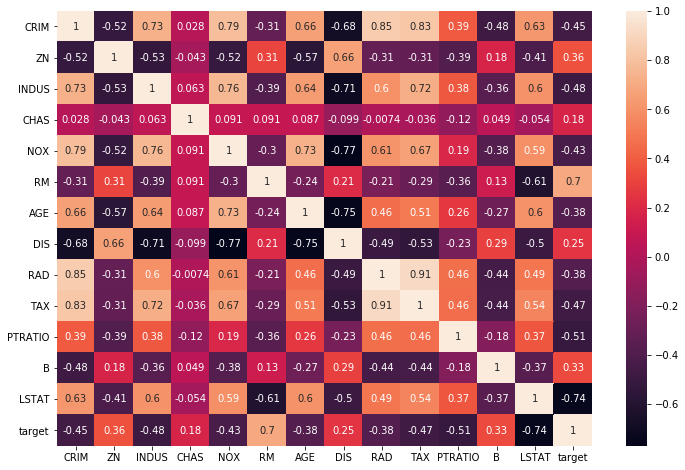

In [33]:
corr_hmap=bos.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_hmap,annot=True)
plt.show()

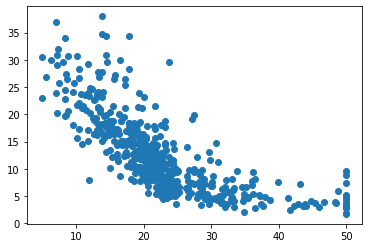

In [34]:
plt.scatter(bos['target'],bos['LSTAT'])
plt.show()

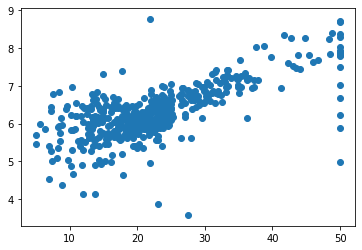

In [35]:
plt.scatter(bos['target'],bos['RM'])
plt.show()

In [36]:
bos.drop('LSTAT',axis=1,inplace=True)

In [37]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2


In [38]:
bos_new=bos[(z<3).all(axis=1)]  #removing outliers

In [39]:
bos_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,22.4
502,-3.095111,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,20.6
503,-2.800824,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,23.9
504,-2.211009,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,22.0


In [40]:
bos_new.shape

(415, 13)

In [41]:
bos=bos_new
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,22.4
502,-3.095111,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,20.6
503,-2.800824,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,23.9
504,-2.211009,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,22.0


In [42]:
bos.shape

(415, 13)

In [43]:
x=bos.iloc[:,0:-1]
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [44]:
y=bos.iloc[:,-1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [45]:
x.shape

(415, 12)

In [46]:
y.shape

(415,)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [48]:
x_train.shape

(278, 12)

In [49]:
x_test.shape

(137, 12)

In [50]:
y_train.shape

(278,)

In [51]:
y_test.shape

(137,)

In [52]:
lm=LinearRegression()


In [53]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
lm.coef_

array([ 4.14796426e-01, -9.48452702e-03, -4.06227602e-02, -1.55845822e-13,
       -1.23983569e+01,  8.31144766e+00, -6.77907881e-02, -1.13441493e+00,
        5.01745969e-02, -1.14702471e-02, -7.86910388e-01,  9.22717357e-03])

In [55]:
lm.intercept_

1.8854666465849164

In [56]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'target'],
      dtype='object')

In [57]:
lm.score(x_train,y_train)

0.7450145138939896

In [58]:
#predict the value
pred=lm.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price:',y_test)

Predicted Result Price: [20.52442424 14.50954987 31.48981889 18.38422384 13.11595168 20.74166358
 17.31106356 25.10782451 29.63472112 10.80717631 17.72388147 15.66550921
  8.98488733 24.2796744  28.0476132  10.66047743 25.72749894 27.39232049
 24.82886327 14.00150342 21.74381609 19.10692104 23.56431589 12.02612149
 21.95599491 21.65951382 31.75447852 27.59747081 22.12417845 25.11716752
 32.44831628 14.71524841 13.54990408 26.20905344 15.60321561 15.05490348
 26.86359361 22.35845603 13.86144763 18.99549243 17.0945682  18.05130457
 20.53768755 26.7156161  17.09451963 26.13236614 19.94441974 19.53061132
 17.73605627 24.45928944 20.77561576 19.08973639 39.75458281 13.43911029
 19.02561668 22.10396188 18.67498499 41.20330795 20.14021397 18.15193296
 26.50489232 16.78844208 24.55486022 27.9783275  14.51500777  5.34938429
 34.18098705 19.63353383 19.10870329 22.45899667 35.32998138 19.93681787
 24.22017841 24.67056111 15.35382945 22.52605265 16.4249922  17.9233105
 22.49542546 16.40495667 17.

In [59]:
print('error:')
print('Mean Absolute Error:', mean_absolute_error(y_test,pred))
print('Mean Squared Error:', mean_squared_error(y_test,pred))

print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean Absolute Error: 2.8280705019261414
Mean Squared Error: 25.677469856868534
Root Mean Squared Error: 5.067294135617996


In [60]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.5559219963471586


In [61]:
t=np.array([0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90])

In [62]:
t.shape

(12,)

In [63]:
t=t.reshape(1,-1)
t.shape

(1, 12)

In [64]:
lm.predict(t)

array([28.81878168])

In [65]:
td=np.array([0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90])
td.shape

(12,)

In [66]:
td=td.reshape(1,-1)
td.shape

(1, 12)

In [67]:
lm.predict(td)

array([20.17101257])

In [68]:
from sklearn.model_selection import cross_val_score

lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Regularization:: L1 and L2 

        L1-Lasso Regression
        L2-Ridge Regression

In [69]:
from sklearn.linear_model import Lasso, Ridge

In [70]:
# will reduce the coefficient to zero(those features are informative)

#default value of alpha=1.0
ls=Lasso(alpha=0.01)
#ls=Lasso(alpha=1.0) # Default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.7443982991878515

In [71]:
ls.coef_

array([ 0.32961225, -0.00914333, -0.0510156 ,  0.        , -8.33119819,
        8.3342232 , -0.07029557, -1.06253372,  0.05386512, -0.01182703,
       -0.7488947 ,  0.00941899])

In [72]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

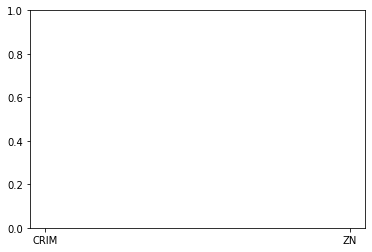

In [73]:
plt.bar(boston.feature_names, ls.coef_)
plt.show()

In [74]:
#try to minimize the coefficient variance
rd=Ridge(alpha=0.01)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.7450134052449653

In [75]:
rd.coef_

array([ 4.11737950e-01, -9.46217524e-03, -4.11206531e-02,  0.00000000e+00,
       -1.22252286e+01,  8.31268060e+00, -6.79102176e-02, -1.13155749e+00,
        5.02692893e-02, -1.14860816e-02, -7.85305578e-01,  9.23761487e-03])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

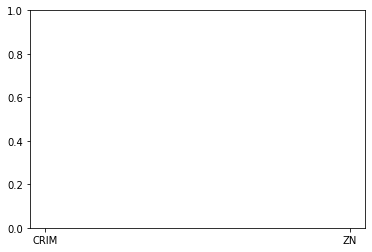

In [76]:
plt.bar(boston.feature_names, rd.coef_)
plt.show()

In [77]:
#ElasticNet is a combination of both Lasso and Ridge

from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_


0.587775233392819


array([ 0.        ,  0.01214352, -0.19061518,  0.        , -0.        ,
        2.57437688, -0.06041051, -0.74133632,  0.21605109, -0.01804757,
       -0.8482176 ,  0.01443632])

In [78]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)


In [79]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.7260249796214113
0.1702223954883002
0.1744895297954725


# Random Forest Regressor- Bagging and Boosting

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
rf=RandomForestRegressor(n_estimators=270,random_state=40)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))

0.971623405525615


In [85]:
pred=rf.predict(x_test)
pred

array([23.355 , 16.331 , 28.088 , 19.5955, 13.123 , 20.933 , 19.959 ,
       23.529 , 28.016 , 10.2155, 20.4825, 14.801 , 17.107 , 21.9285,
       26.599 , 16.0405, 22.499 , 29.048 , 29.3125, 17.832 , 21.1415,
       18.728 , 22.205 ,  9.486 , 21.553 , 21.773 , 28.7225, 26.635 ,
       18.8735, 24.835 , 32.776 , 15.638 , 12.7415, 24.0205, 17.286 ,
       15.453 , 26.607 , 22.353 , 18.2115, 20.646 , 15.7435, 20.0395,
       23.3305, 24.23  , 19.202 , 24.3045, 19.944 , 19.006 , 18.856 ,
       24.178 , 20.803 , 18.31  , 43.541 , 16.8875, 21.822 , 21.6045,
       20.049 , 45.3695, 17.113 , 20.021 , 24.031 , 20.5365, 22.8545,
       26.3155, 13.5925,  9.209 , 33.7275, 19.9325, 17.5155, 21.1695,
       33.3705, 19.101 , 21.952 , 25.204 , 19.186 , 20.535 , 17.121 ,
       18.478 , 21.1815,  9.9965, 16.345 , 21.8425, 22.458 , 26.478 ,
       15.2785, 24.511 , 18.9765, 22.2675, 20.6795, 19.943 , 14.441 ,
       17.5425, 16.0555, 19.489 , 20.4485, 33.0485, 18.493 , 44.315 ,
       26.1235, 22.8

AdaBoostRegressor

In [108]:
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
abpred=model.predict(x_test)
print(abpred)
model.score(x_test,y_test)

0.8900288126499678
[22.32068966 16.03381295 28.07428571 21.00227273 12.2185567  20.23103448
 17.15       22.13333333 27.25846154 13.17368421 18.76891892 15.97976879
 16.0443038  25.636      25.66111111 15.60769231 22.4        28.19777778
 32.39491525 16.03381295 19.07019868 18.9902439  22.4        12.71349206
 22.5314433  22.5314433  28.84210526 25.66111111 20.06521739 22.78251748
 30.84366197 17.15       14.41761006 21.70289855 16.03381295 17.15
 25.80727273 22.805      15.60769231 22.4        16.03381295 18.74625
 20.31578947 24.8        18.74625    22.51346154 20.50304878 20.50304878
 18.9902439  22.51346154 21.1112069  21.00227273 43.13333333 16.54113475
 20.06521739 21.70289855 20.06521739 44.56666667 18.9902439  18.86515152
 22.4        18.74625    22.32068966 27.25846154 14.64215686 12.2185567
 32.66792453 20.42156863 18.86515152 21.00227273 32.35277778 18.86515152
 22.78251748 25.31333333 20.9557377  20.50304878 17.15       17.15
 21.00227273 11.49452055 18.86515152 21.1112069 

0.6314529625070282

GradientBoostingRegressor

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
model1=GradientBoostingRegressor()
model1.fit(x_train,y_train)
print(model1.score(x_train,y_train))
abpred1=model1.predict(x_test)
print(abpred1)
model1.score(x_test,y_test)

0.9811098934857182
[23.2719781  12.73759353 28.44303884 19.80460124  8.65510972 20.10550659
 19.31894403 21.95656551 29.60312562 10.60937531 20.24402347 11.7349292
 16.55210329 23.65665614 27.17573158 15.57144018 24.52957545 29.26188295
 30.03152646 17.61834402 20.39523169 17.79435704 23.39845162 10.02745397
 22.71458826 20.88761881 28.98102508 26.63509286 19.2632055  24.08362753
 31.7620666  15.67774547 11.44488318 24.27689043 17.57645192 15.72184537
 26.17760661 22.20883346 14.07670138 18.50725071 16.27889487 19.48891872
 22.85371079 24.48676939 19.38346765 24.15268286 17.2626678  19.11553185
 18.46182891 23.07048964 20.79661789 15.61012757 41.39146766 16.2784406
 19.8997717  18.85956761 19.79895914 43.90655579 17.36315341 19.90120699
 24.45216969 19.56255741 23.69812253 28.51666099 14.78908331  7.70600535
 34.46825167 15.85534977 18.03476612 21.66730603 34.52709501 19.37914821
 23.70523146 25.0846016  19.8966504  20.83323257 15.90808191 18.21721495
 21.37957844 11.50166986 17.677947

0.6313142892845582